<a href="https://colab.research.google.com/github/CodeXplod/CodeXplod/blob/main/project_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Create a popularity based recommender system at a genre level. User will
input a genre (g), minimum ratings threshold (t) for a movie and no. of
recommendations(N) for which it should be recommended top N movies
which are most popular within that genre (g) ordered by ratings in descending
order where each movie has at least (t) reviews

Importing required libraries for data preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Reading the Datasets into Dataframes named Movies and Ratings

In [ ]:
movie = pd.read_csv("/content/movies.csv")
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [ ]:
ratin = pd.read_csv("/content/ratings.csv")
ratin.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


Merging the datasets on a common column "movieId"

In [ ]:
movie = pd.merge(movie, ratin, on = 'movieId')
movie

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286
...,...,...,...,...,...,...
105334,148238,A Very Murray Christmas (2015),Comedy,475,3.0,1451213043
105335,148626,The Big Short (2015),Drama,458,4.0,1452014749
105336,148626,The Big Short (2015),Drama,576,4.5,1451687664
105337,148626,The Big Short (2015),Drama,668,4.5,1451148148


Counting the number of unique users

In [ ]:
movie.userId.nunique()

668

Counting the number of unique movies and unique movieIds

In [ ]:
print(movie.title.nunique())
movie.movieId.nunique()

10323


10325

Splitting the genres of all movies and creating a new record for each genre

In [ ]:
movie = movie.assign(genres = movie['genres'].str.split('|')).explode('genres')
movie

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure,2,5.0,859046895
0,1,Toy Story (1995),Animation,2,5.0,859046895
0,1,Toy Story (1995),Children,2,5.0,859046895
0,1,Toy Story (1995),Comedy,2,5.0,859046895
0,1,Toy Story (1995),Fantasy,2,5.0,859046895
...,...,...,...,...,...,...
105334,148238,A Very Murray Christmas (2015),Comedy,475,3.0,1451213043
105335,148626,The Big Short (2015),Drama,458,4.0,1452014749
105336,148626,The Big Short (2015),Drama,576,4.5,1451687664
105337,148626,The Big Short (2015),Drama,668,4.5,1451148148


Finding the unique genres and the number of genres

In [ ]:
print(movie['genres'].unique())
movie['genres'].nunique()

['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'IMAX' 'War'
 'Musical' 'Documentary' 'Western' 'Film-Noir' '(no genres listed)']


20

Creating a distribution plot by genre

<Axes: xlabel='genres', ylabel='Count'>

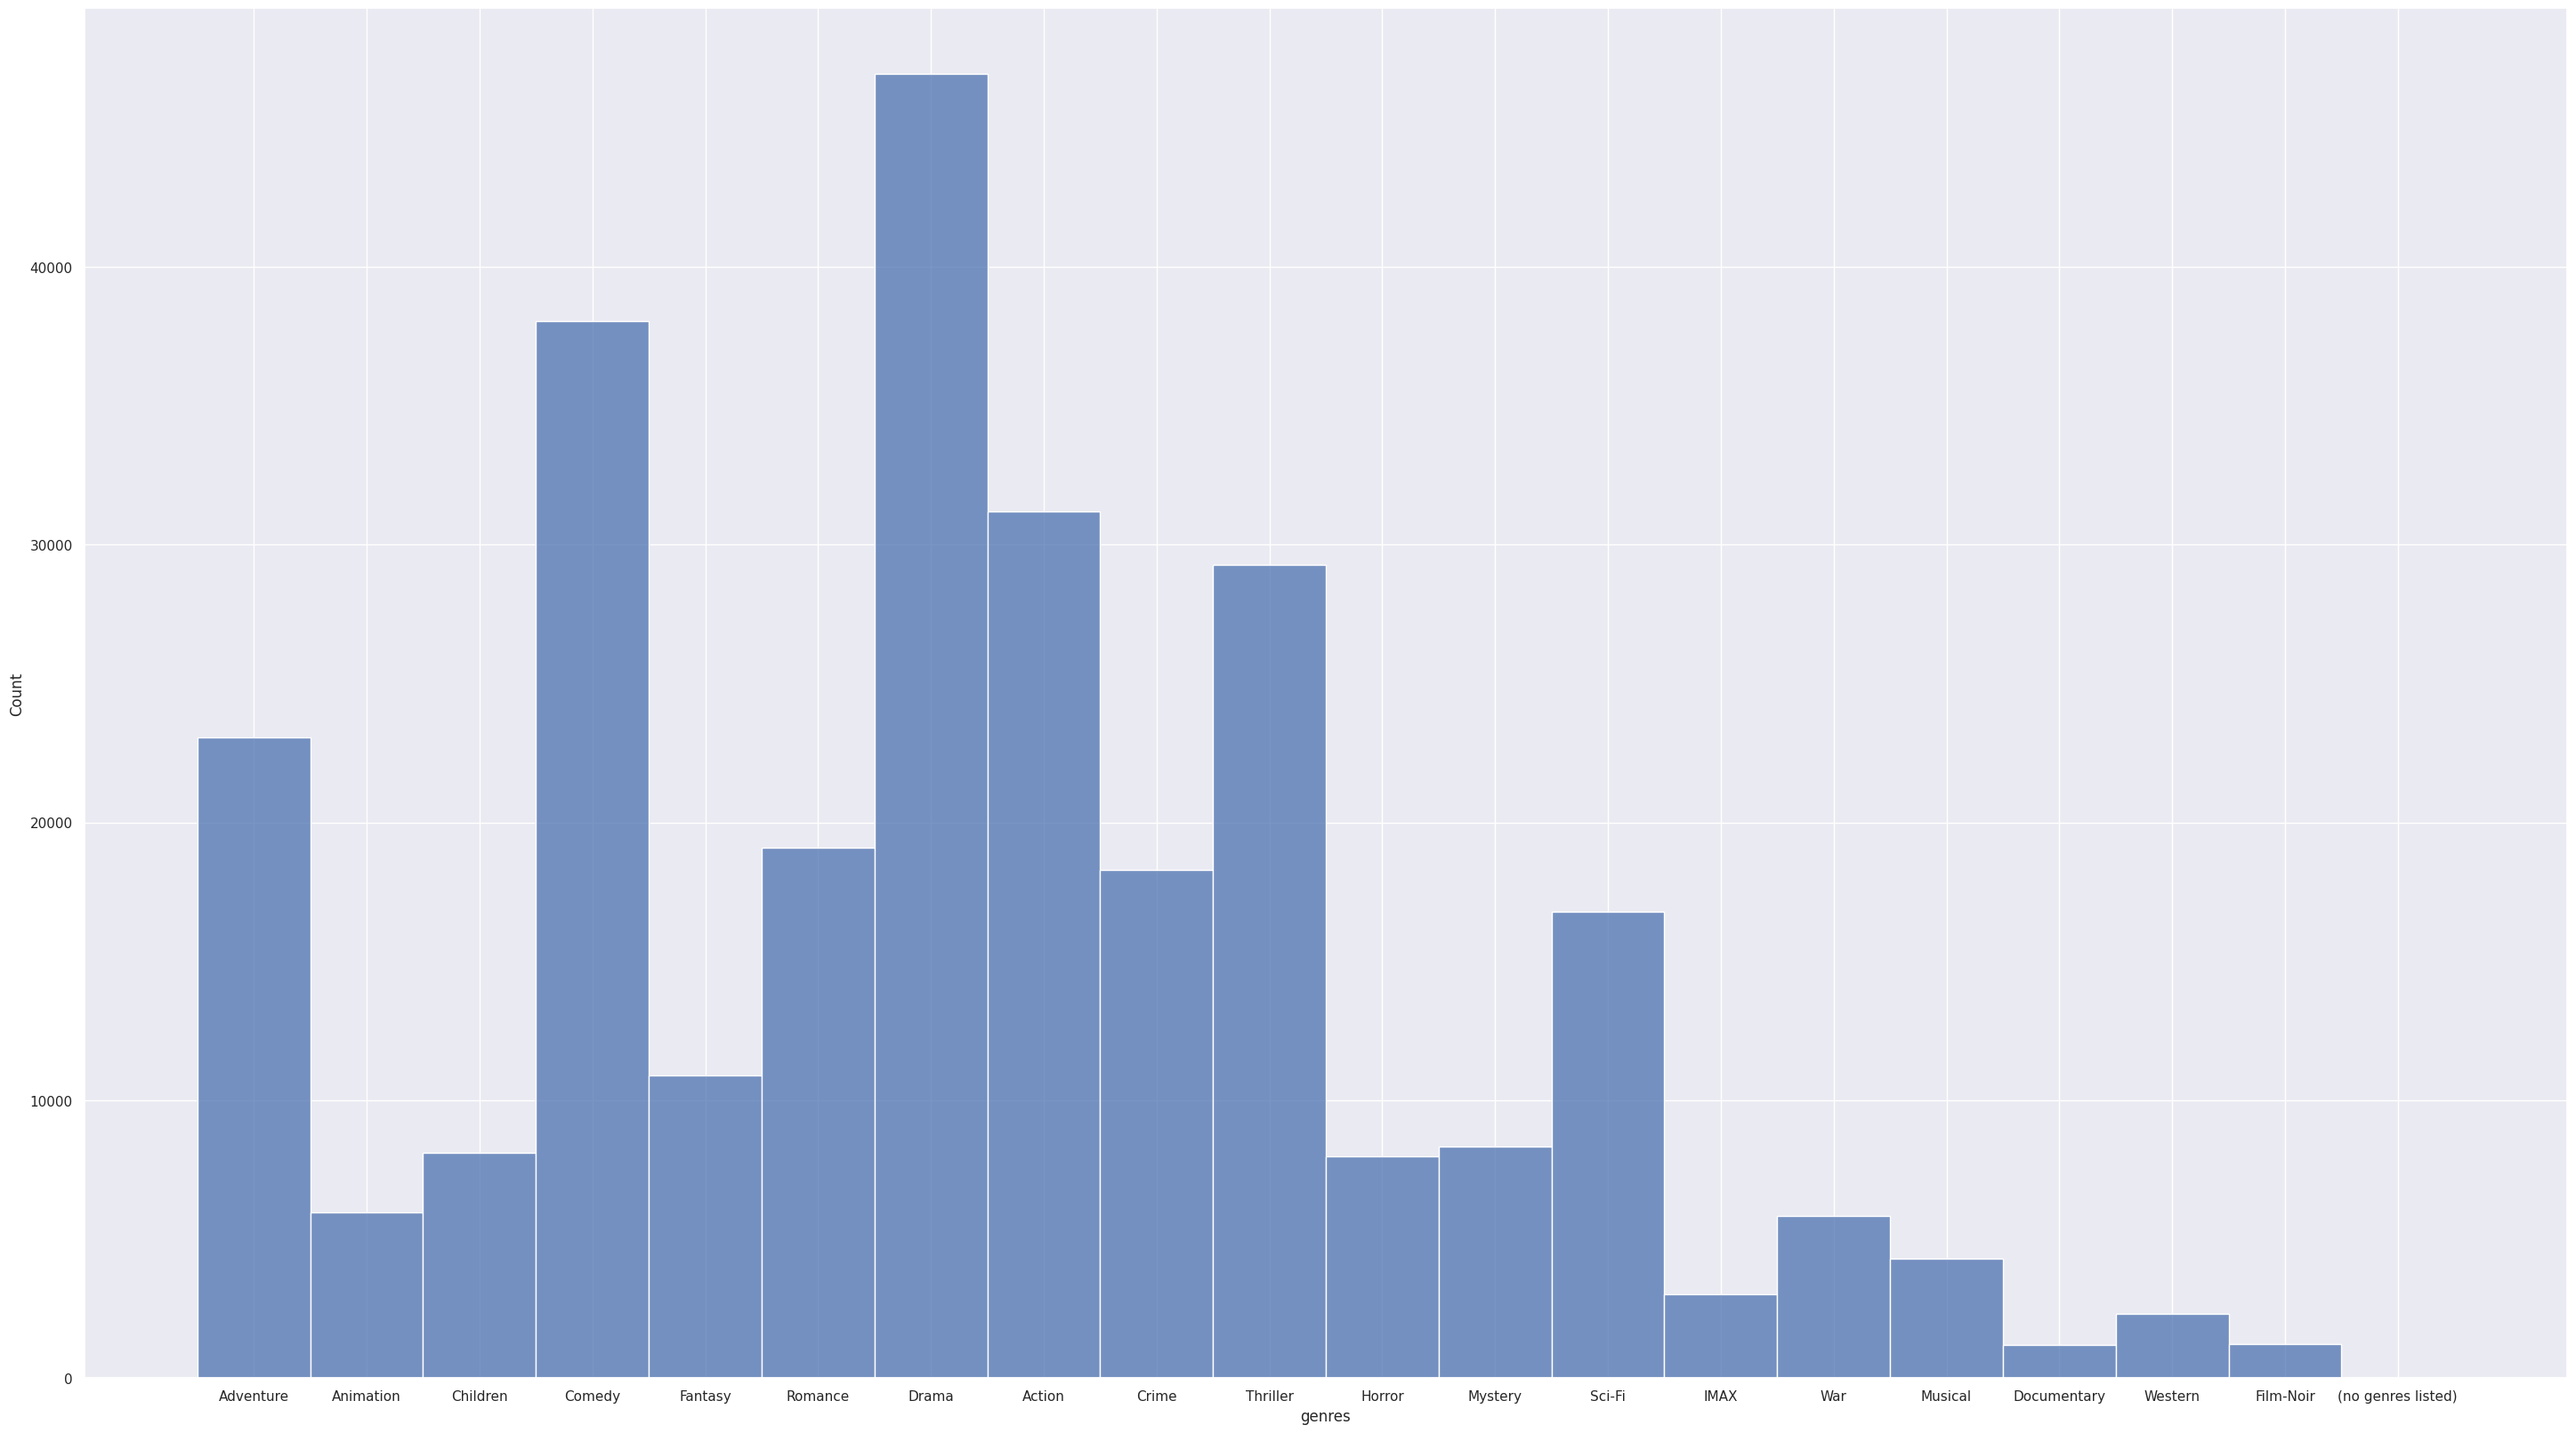

In [ ]:
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(36, 20)})

sns.histplot(movie, x = "genres")

Grouping by movie id and title, we find the avg rating of each movie

In [ ]:
mean_rating = movie.groupby(["movieId", "title"])[["rating"]].agg('mean')
mean_rating.round(decimals=1)

,,rating
movieId,title,
1,Toy Story (1995),3.9
2,Jumanji (1995),3.4
3,Grumpier Old Men (1995),3.2
4,Waiting to Exhale (1995),2.8
5,Father of the Bride Part II (1995),3.2
...,...,...
146684,Cosmic Scrat-tastrophe (2015),4.0
146878,Le Grand Restaurant (1966),2.5
148238,A Very Murray Christmas (2015),3.0


Creating a new column in the Dataframe for the mean ratings of all movies

In [ ]:
movie["mean_rating"] = movie.groupby(["title"])[["rating"]].transform('mean')

movie

,movieId,title,genres,userId,rating,timestamp,mean_rating
0,1,Toy Story (1995),Adventure,2,5.0,859046895,3.907328
0,1,Toy Story (1995),Animation,2,5.0,859046895,3.907328
0,1,Toy Story (1995),Children,2,5.0,859046895,3.907328
0,1,Toy Story (1995),Comedy,2,5.0,859046895,3.907328
0,1,Toy Story (1995),Fantasy,2,5.0,859046895,3.907328
...,...,...,...,...,...,...,...
105334,148238,A Very Murray Christmas (2015),Comedy,475,3.0,1451213043,3.000000
105335,148626,The Big Short (2015),Drama,458,4.0,1452014749,4.333333
105336,148626,The Big Short (2015),Drama,576,4.5,1451687664,4.333333
105337,148626,The Big Short (2015),Drama,668,4.5,1451148148,4.333333


Rounding off the mean ratings to 1 decimal place

In [ ]:
movie["mean_rating"] = movie["mean_rating"].round(decimals=1)

In [ ]:
movie

,movieId,title,genres,userId,rating,timestamp,mean_rating
0,1,Toy Story (1995),Adventure,2,5.0,859046895,3.9
0,1,Toy Story (1995),Animation,2,5.0,859046895,3.9
0,1,Toy Story (1995),Children,2,5.0,859046895,3.9
0,1,Toy Story (1995),Comedy,2,5.0,859046895,3.9
0,1,Toy Story (1995),Fantasy,2,5.0,859046895,3.9
...,...,...,...,...,...,...,...
105334,148238,A Very Murray Christmas (2015),Comedy,475,3.0,1451213043,3.0
105335,148626,The Big Short (2015),Drama,458,4.0,1452014749,4.3
105336,148626,The Big Short (2015),Drama,576,4.5,1451687664,4.3
105337,148626,The Big Short (2015),Drama,668,4.5,1451148148,4.3


Grouping by genres and title, we create a new column that counts the number of ratings per movie

In [ ]:
movie["num_reviews"] = movie.groupby(["genres", "title"])["mean_rating"].transform('count')

movie

,movieId,title,genres,userId,rating,timestamp,mean_rating,num_reviews
0,1,Toy Story (1995),Adventure,2,5.0,859046895,3.9,232
0,1,Toy Story (1995),Animation,2,5.0,859046895,3.9,232
0,1,Toy Story (1995),Children,2,5.0,859046895,3.9,232
0,1,Toy Story (1995),Comedy,2,5.0,859046895,3.9,232
0,1,Toy Story (1995),Fantasy,2,5.0,859046895,3.9,232
...,...,...,...,...,...,...,...,...
105334,148238,A Very Murray Christmas (2015),Comedy,475,3.0,1451213043,3.0,1
105335,148626,The Big Short (2015),Drama,458,4.0,1452014749,4.3,3
105336,148626,The Big Short (2015),Drama,576,4.5,1451687664,4.3,3
105337,148626,The Big Short (2015),Drama,668,4.5,1451148148,4.3,3


Sorting the Dataframe by number of reviews and the mean ratings in descending order

In [ ]:
movie = movie.sort_values(by = ["num_reviews","mean_rating"], ascending = False)

In [ ]:
movie

,movieId,title,genres,userId,rating,timestamp,mean_rating,num_reviews
8708,296,Pulp Fiction (1994),Comedy,1,4.0,1217896125,4.2,325
8708,296,Pulp Fiction (1994),Crime,1,4.0,1217896125,4.2,325
8708,296,Pulp Fiction (1994),Drama,1,4.0,1217896125,4.2,325
8708,296,Pulp Fiction (1994),Thriller,1,4.0,1217896125,4.2,325
8709,296,Pulp Fiction (1994),Comedy,3,5.0,841483462,4.2,325
...,...,...,...,...,...,...,...,...
105163,132157,Paul Blart: Mall Cop 2 (2015),Comedy,642,0.5,1439788248,0.5,1
105163,132157,Paul Blart: Mall Cop 2 (2015),Crime,642,0.5,1439788248,0.5,1
105324,143882,Operator (2015),Action,458,0.5,1444726850,0.5,1
105324,143882,Operator (2015),Drama,458,0.5,1444726850,0.5,1


creating a new dataframe to store the original cleaned dataframe. Now we will work on this new dataframe so that the original data is not affected

In [ ]:
movies = movie
movies

,movieId,title,genres,userId,rating,timestamp,mean_rating,num_reviews
8708,296,Pulp Fiction (1994),Comedy,1,4.0,1217896125,4.2,325
8708,296,Pulp Fiction (1994),Crime,1,4.0,1217896125,4.2,325
8708,296,Pulp Fiction (1994),Drama,1,4.0,1217896125,4.2,325
8708,296,Pulp Fiction (1994),Thriller,1,4.0,1217896125,4.2,325
8709,296,Pulp Fiction (1994),Comedy,3,5.0,841483462,4.2,325
...,...,...,...,...,...,...,...,...
105163,132157,Paul Blart: Mall Cop 2 (2015),Comedy,642,0.5,1439788248,0.5,1
105163,132157,Paul Blart: Mall Cop 2 (2015),Crime,642,0.5,1439788248,0.5,1
105324,143882,Operator (2015),Action,458,0.5,1444726850,0.5,1
105324,143882,Operator (2015),Drama,458,0.5,1444726850,0.5,1


Finding the total number of movies per genre

In [ ]:
total_movies_by_genre = movies.groupby("genres")["title"].nunique()
total_movies_by_genre

genres
(no genres listed)       7
Action                1736
Adventure             1164
Animation              400
Children               540
Comedy                3513
Crime                 1440
Documentary            415
Drama                 5217
Fantasy                670
Film-Noir              195
Horror                1001
IMAX                   152
Musical                409
Mystery                675
Romance               1788
Sci-Fi                 858
Thriller              2187
War                    503
Western                235
Name: title, dtype: int64

Confirming the total number of unique movies to ensure that the data is not altered in the due process

In [ ]:
total_unique_movies = movie.title.nunique()
total_unique_movies

10323

Dropping columns

In [ ]:
movies = movies.drop(columns = ["rating", "timestamp", 'userId'])

Verifying the dataframe information based on columns

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281904 entries, 8708 to 105324
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      281904 non-null  int64  
 1   title        281904 non-null  object 
 2   genres       281904 non-null  object 
 3   mean_rating  281904 non-null  float64
 4   num_reviews  281904 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 12.9+ MB


In [ ]:
movies

,movieId,title,genres,mean_rating,num_reviews
8708,296,Pulp Fiction (1994),Comedy,4.2,325
8708,296,Pulp Fiction (1994),Crime,4.2,325
8708,296,Pulp Fiction (1994),Drama,4.2,325
8708,296,Pulp Fiction (1994),Thriller,4.2,325
8709,296,Pulp Fiction (1994),Comedy,4.2,325
...,...,...,...,...,...
105163,132157,Paul Blart: Mall Cop 2 (2015),Comedy,0.5,1
105163,132157,Paul Blart: Mall Cop 2 (2015),Crime,0.5,1
105324,143882,Operator (2015),Action,0.5,1
105324,143882,Operator (2015),Drama,0.5,1



Solution 1 - Design a Popularity Based Movie Recommendation System.

Taking input from user to recommend movies based on parameters provided by the user

In [ ]:
g = str(input("Enter a genre : "))
r = float(input("enter minimum rating : "))
t = int(input("Enter minimum Reviews : "))
n = int(input("Enter no of recommendations : "))

movies[(movies['genres'] == g) & (movies['num_reviews']> t) & (movies['mean_rating']> r)].sort_values(by = ['mean_rating', 'num_reviews'], ascending = False).drop_duplicates(subset= ['movieId', 'title','genres','mean_rating', 'num_reviews'], keep= "first").head(n)



Enter a genre : Thriller
enter minimum rating : 3
Enter minimum Reviews : 70
Enter no of recommendations : 5


,movieId,title,genres,mean_rating,num_reviews
53396,2571,"Matrix, The (1999)",Thriller,4.3,261
2617,50,"Usual Suspects, The (1995)",Thriller,4.3,228
19147,608,Fargo (1996),Thriller,4.3,201
92180,48516,"Departed, The (2006)",Thriller,4.3,87
23261,904,Rear Window (1954),Thriller,4.3,74




################################################################################################################################################################################################################################################



Q3. Create a collaborative based recommender system which recommends top N
movies based on “K” similar users for a target user “u”

In [ ]:

import pandas as pd
import numpy as np

# Taking user input
userid = int(input('Enter User ID : '))
k = int(input('Enter number of similar users : '))
n = int(input('enter no of recommendations : '))

# Reading the 'Movies' and 'Ratings' datasets
movies = pd.read_csv('/content/movies.csv')


ratings=pd.read_csv('/content/ratings.csv')


# Merging the two datasets
merged = pd.merge(ratings, movies, on='movieId', how='inner')

# Grouping the dataframe by title and calculating the Mean and the Count of the ratings
agg_ratings = merged.groupby('title').agg(mean_rating = ('rating', 'mean'), number_of_ratings = ('rating', 'count')).reset_index()

# filtering out movies with count less than 50 (Can be maipulated based on user requirement)
agg_ratingsF = agg_ratings[agg_ratings['number_of_ratings']> 50]

# Sorting the movies based on number of ratings in decreasing order
agg_ratingsF.sort_values(by='number_of_ratings', ascending=False)

# Merging the merged dataframe with the title column of the sorted ratings
merge = pd.merge(merged, agg_ratingsF[['title']], on='title', how='inner')

# Pivot the Dataframe on given parameters
matrix = merge.pivot_table(index='userId', columns='title', values='rating')

# Normalizing the pivoted dataframe, calculation= x - mean(x)
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')

# Finding similar users
similar = matrix_norm.T.corr()


# Dropping the input User Id (self Id)
similar.drop(index=userid, inplace=True)


# Setting user Minimum Similarity Threshold
user_similarity_threshold = 0.3

# Finding top K similar users
similar_users = similar[similar[userid]>user_similarity_threshold][userid].sort_values(ascending=False)[:k]

# Finding movies watched by the user
userid_watched = matrix_norm[matrix_norm.index == userid].dropna(axis=1, how='all')

# Movies watched by similar users
similar_user_movies = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')

# Dropping movies watched by the user
similar_user_movies.drop(userid_watched.columns,axis=1, inplace=True, errors='ignore')


# To Recommend Movies, first we have to find the movie scores

# A dictionary to store movie scores
movies_score = {}

# Iterate through columns of dataframe
for i in similar_user_movies.columns:
# Get the ratings for movie i
  movie_rating = similar_user_movies[i]
# Initiating a variable to store the score
  total = 0
# Initiating a variable to store the number of scores
  count = 0
# Iterate through similar users
  for u in similar_users.index:
# If the movie has no null rating
    if pd.isna(movie_rating[u]) == False:
# Score is the sum of user similarity score multiply by the movie rating
      score = similar_users[u] * movie_rating[u]
# Add the score to the total score for the movie so far
      total += score
# Add 1 to the count
      count +=1
# Get the average score for the item
  movies_score[i] = total / count




# Convert dictionary to pandas dataframe
movies_score = pd.DataFrame(movies_score.items(), columns=['movie', 'movie_score'])

# Sort the movies by their scores in descending order
ranked_movies_score = movies_score.sort_values(by='movie_score', ascending=False)

# Select top m movies
ranked_movies_score.head(n)


Enter User ID : 44
Enter number of similar users : 10
enter no of recommendations : 10


,movie,movie_score
104,Thelma & Louise (1991),1.538462
62,Jumanji (1995),1.312500
99,Star Trek: Generations (1994),1.248168
93,Sleepless in Seattle (1993),1.135135
90,Schindler's List (1993),1.135135
66,Legends of the Fall (1994),1.135135
14,Braveheart (1995),1.125260
76,Naked Gun 33 1/3: The Final Insult (1994),1.115385
53,Home Alone (1990),1.115385
60,Johnny Mnemonic (1995),1.115385
